## Read data
Opening and reading the data from the COCTAILL corpus.

### Exclude stop words

In [1]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words= stopwords.words('swedish')

print(stop_words)

['och', 'det', 'att', 'i', 'en', 'jag', 'hon', 'som', 'han', 'på', 'den', 'med', 'var', 'sig', 'för', 'så', 'till', 'är', 'men', 'ett', 'om', 'hade', 'de', 'av', 'icke', 'mig', 'du', 'henne', 'då', 'sin', 'nu', 'har', 'inte', 'hans', 'honom', 'skulle', 'hennes', 'där', 'min', 'man', 'ej', 'vid', 'kunde', 'något', 'från', 'ut', 'när', 'efter', 'upp', 'vi', 'dem', 'vara', 'vad', 'över', 'än', 'dig', 'kan', 'sina', 'här', 'ha', 'mot', 'alla', 'under', 'någon', 'eller', 'allt', 'mycket', 'sedan', 'ju', 'denna', 'själv', 'detta', 'åt', 'utan', 'varit', 'hur', 'ingen', 'mitt', 'ni', 'bli', 'blev', 'oss', 'din', 'dessa', 'några', 'deras', 'blir', 'mina', 'samma', 'vilken', 'er', 'sådan', 'vår', 'blivit', 'dess', 'inom', 'mellan', 'sådant', 'varför', 'varje', 'vilka', 'ditt', 'vem', 'vilket', 'sitta', 'sådana', 'vart', 'dina', 'vars', 'vårt', 'våra', 'ert', 'era', 'vilkas']


[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusihaliel@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Open and read the XML files

In [2]:
data_path = "../data/"

In [37]:
import os
import re
import xml.etree.ElementTree as ET 
from xml.etree.ElementTree import tostring
from itertools import chain

text_data = {}
all_genres = {}

main_cat = {}
sub_cat = {}

path = data_path+'COCTAILL-full'
count = 0
for filename in os.listdir(path):   
    # only parse xml files 
    if not filename.endswith('.xml'): continue
    print(filename)
    fullname = os.path.join(path, filename)
    tree = ET.parse(fullname)
    root = tree.getroot() 
    all_name_elements = root.findall('.//lessontext')  
    
    for elem in all_name_elements:
        count +=1
        
        # some texts might not have a genre
        try:
            genres = elem.attrib['genre'] #genre/s       
        except KeyError: 
            genres = "none"
            
        #genres =re.sub(r'(\|)', ' ', genres) 
        #genres =re.sub(r'(?<=\w)(\||\/)(?=\w)', ' ', genres) 
        #genres =re.sub(r'(\|)', '', genres) 
        # split into lists
        genres= genres.split("|")        
        #genres = [i.split('/') for i in genres]
        # unnest the lists
        #genres=list(chain.from_iterable(genres)) 
        # remove empty items
        genres = list(filter(None, genres))
        # remove duplicates
        #genres = list(dict.fromkeys(genres))

        notags = ET.tostring(elem, encoding='unicode', method='text')              
        # replace abbverbiatons will full words
        notags = notags.replace("dvs.","det vill säga")
        notags = notags.replace("t.ex.","till exempel")
        notags = notags.replace("f.kr.","före kristus")
        notags = notags.replace("e.kr.","efter kristus") 
        notags = notags.replace("bl. a.","bland annat") 
        notags = notags.replace("nr.","nummer") 
        notags = notags.replace("resp.","respektive")
        # some misspellings...
        notags = notags.replace("biblotekarien","bibliotekarien") 
        
        # remove wierd characters and numbers
        notags = re.sub(r'([\-\_\^\«\:\,\¬\%\+\=\/\(\—\)\;\"\*\°]|[0-9])', ' ', notags)  
        # remove unnecessary whitespaces
        notags = re.sub(r'(\s{2,}|\n)', ' ', notags)  
        # lowercase the words
        notags = notags.lower()

        text_data[count] = {
            "genre":genres,
            "sentences":notags
        }
        for g in genres:
            # count main- and sub categories
            try:
                m,s = g.split("/")[0], g.split("/")[1]
            except IndexError:
                m = g 
                s= g
            
            if g in all_genres:
                all_genres[g] += 1
            else:
                all_genres[g] = 1
          
            if m in main_cat:
                main_cat[m] += 1
            else: 
                main_cat[m] = 1
            
            if s in sub_cat:
                sub_cat[s] += 1
            else:
                sub_cat[s] =1


nya_mal_1.xml
nya_mal_2.xml
nya_mal_3.xml
pa_svenska_1.xml
pa_svenska_2.xml
pa_svenska_3.xml
rivstartA1A2.xml
rivstart_b1b2.xml
skrivtrappan.xml
Sprakporten_1_2_3.xml
Sprakporten_BAS.xml
Svenska_utifran.xml


### Look at the text and genres

In [4]:
import pprint
import random

data_example = random.choice(list(text_data.items()))

pprint.pprint(data_example)
#pprint.pprint(text_data)

(684,
 {'genre': ['narration/description'],
  'sentences': ' ett ungt par lämnar sina tråkiga jobb i stan och åker ut i '
               'skärgården under sommaren . den här filmen gjorde bergman känd '
               'i sverige . den exporterades också till andra länder och '
               'gjorde skandal på många ställen . skandalen berodde på att '
               'filmen visade människor utan kläder . det var den här och '
               'andra filmer under och talet som skapade myten om den svenska '
               'synden . \ufeffden här filmen känner nästan alla till för det '
               'finns en mycket speciell scen där en riddare möter en person '
               'som säger att han är döden . riddaren frågar kommer du för att '
               'hämta mig ? riddaren och döden spelar ett parti schack . om '
               'riddaren vinner får han leva lite till . filmen har ett '
               'religiöst tema och utspelar sig under medeltiden då pesten '
               'döda

## Look at the genre labels

And check if data is imbalanced. 

In [5]:
len(all_genres)

36

In [6]:
all_genres

{'other/dialogue': 209,
 'facts/facts': 100,
 'other/letter': 41,
 'narration/description': 237,
 'narration/fiction': 53,
 'facts/geographical facts': 36,
 'narration/personal story': 95,
 'other/language tip': 91,
 'other/notice': 10,
 'facts/historical facts': 66,
 'facts/biography': 67,
 'other/quotation': 23,
 'narration/news article': 56,
 'facts/instruction': 37,
 'facts/explanation': 49,
 'other/lyrics': 39,
 'facts/procedures': 21,
 'facts/report': 23,
 'other/recipe': 3,
 'facts/rules': 5,
 'facts/demonstration': 1,
 'evaluation/argumentation': 7,
 'evaluation/exposition': 2,
 'evaluation/personal reflection': 64,
 'facts/autobiography': 2,
 'other/anecdote': 21,
 'other/questionnaire': 12,
 'none': 9,
 'evaluation/advertisement': 13,
 'evaluation/discussion': 4,
 'evaluation/argumentation, facts/report': 2,
 'evaluation/review': 1,
 'other/rhyme': 2,
 'other/poem': 7,
 'facts/news article': 1,
 'evaluation/persuasion': 1}

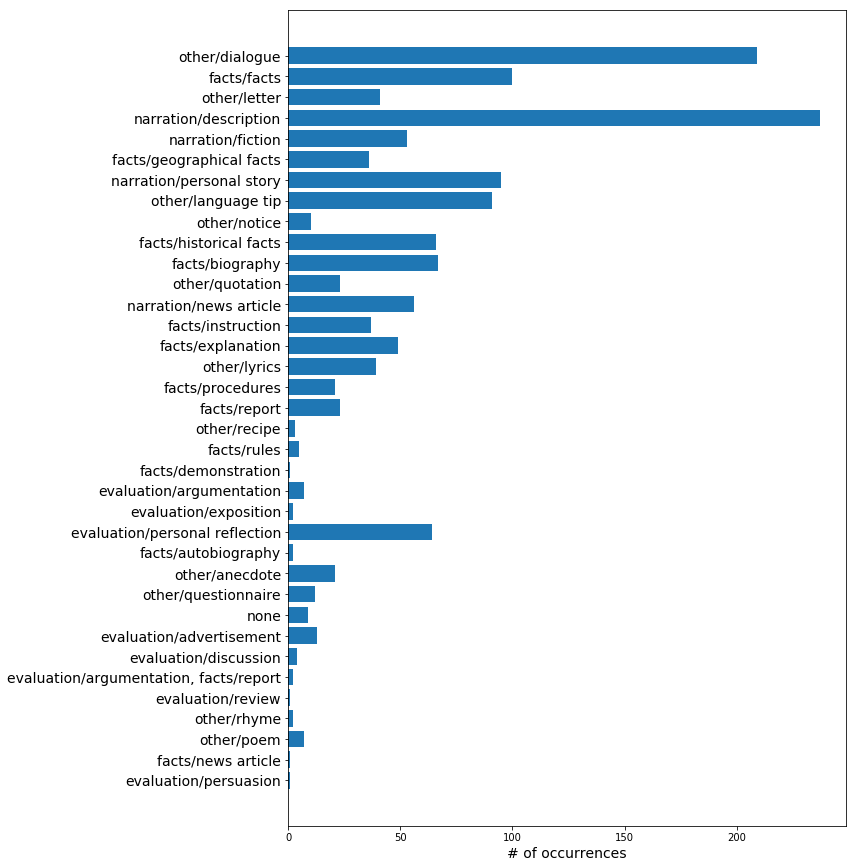

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
            
fig, ax = plt.subplots(figsize=(10,15))
ax.figsize=(40,40)

genre_types = list(all_genres.keys())
y_pos = np.arange(len(genre_types))
performance = list(all_genres.values())

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_types, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of occurrences', fontsize=14)

plt.show()

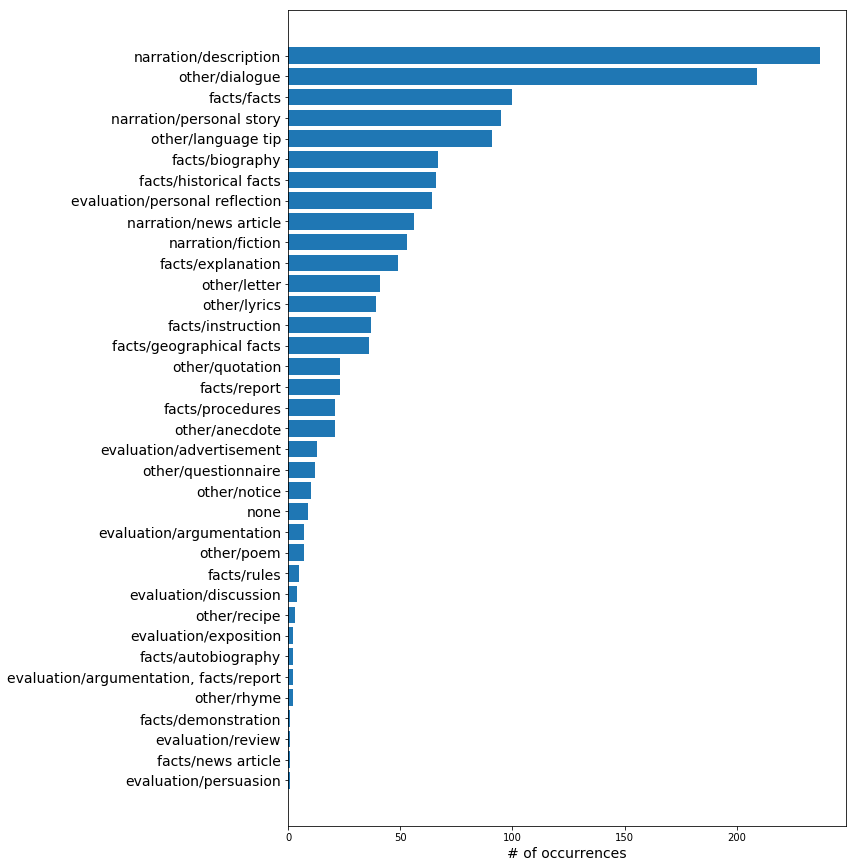

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unique_genres={k: v for k, v in sorted(all_genres.items(), reverse=True, key=lambda item: item[1])}            
fig, ax = plt.subplots(figsize=(10,15))
ax.figsize=(30,30)

genre_types = list(unique_genres.keys())
y_pos = np.arange(len(genre_types))
performance = list(unique_genres.values())

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_types, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of occurrences', fontsize=14)

plt.show()

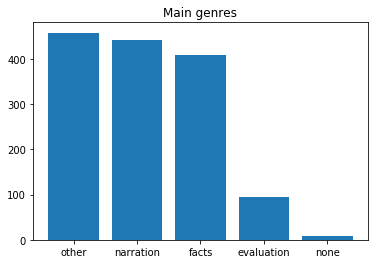

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
main_categories ={k: v for k, v in sorted(main_cat.items(), reverse=True, key=lambda item: item[1])} 

plt.bar(main_categories.keys() , main_categories.values() )
plt.title("Main genres")
plt.show()

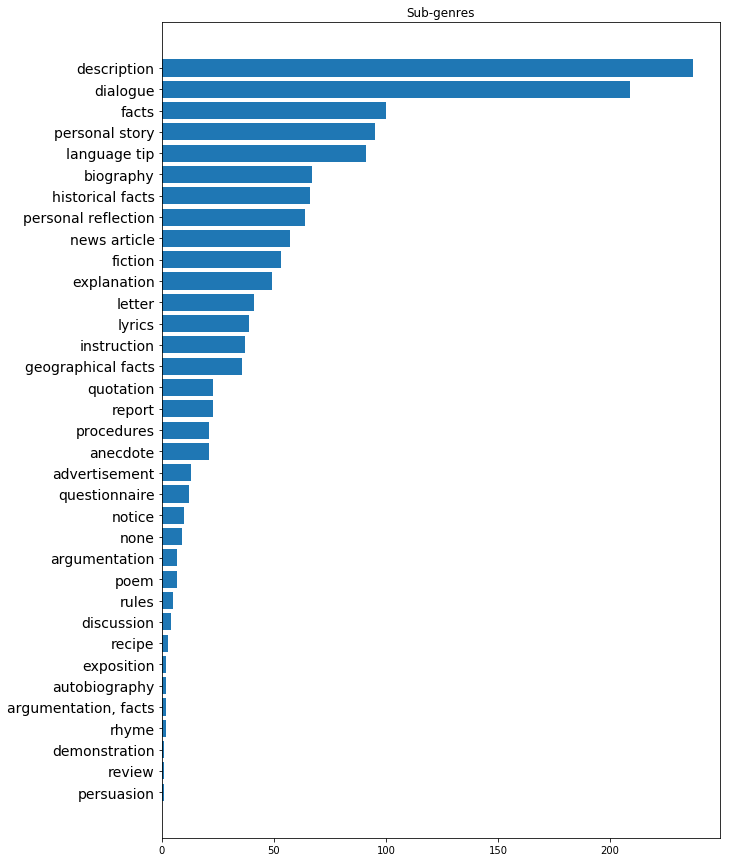

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sub_categories ={k: v for k, v in sorted(sub_cat.items(), reverse=True, key=lambda item: item[1])}     

fig, ax = plt.subplots(figsize=(10,15))
ax.figsize=(30,30)

genre_types = list(sub_categories.keys())
y_pos = np.arange(len(genre_types))
performance = list(sub_categories.values())

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(genre_types, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Sub-genres")

plt.show()

In [11]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  

# random values based on a normal distribution 
x = list(all_genres.values())
  
print ("X : \n", x) 
  
print('\nSkewness for data : ', skew(x)) 

X : 
 [209, 100, 41, 237, 53, 36, 95, 91, 10, 66, 67, 23, 56, 37, 49, 39, 21, 23, 3, 5, 1, 7, 2, 64, 2, 21, 12, 9, 13, 4, 2, 1, 2, 7, 1, 1]

Skewness for data :  2.314537254387671


In [12]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
# normality test
nor = list(all_genres.values())
result = anderson(nor)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.249
15.000: 0.528, data does not look normal (reject H0)
10.000: 0.601, data does not look normal (reject H0)
5.000: 0.721, data does not look normal (reject H0)
2.500: 0.841, data does not look normal (reject H0)
1.000: 1.000, data does not look normal (reject H0)


### Ways to fix shitty data (Re-sample Dataset)

To balance the dataset, either use:
* Under-sampling: Remove samples from over-represented classes; use this for huge datasets
* Over-sampling: Add more samples from under-represented classes; use this for small datasets

**SMOTE** (Synthetic Minority Over-sampling Technique)
SMOTE is an over-sampling method. It creates synthetic samples of the minority class. Use imblearn python package to over-sample the minority classes.

## Gensim model

### Using NLPL Models In-Situ
To avoid data duplication, it is recommended to load models (resulting sets of word vectors) from the NLPL repository directly from the NLPL project directory, when working on Saga or Taito. Repository entries are uniformly packaged as .zip compressed archives, but the uniform naming scheming makes it possible to directly read one or more of the model files from the archive.

Each repository entry (i.e. set of word vectors, or 'model') is packaged in the form of a .zip archive, with uniform conventions for file naming inside the file, using the model.txt and model.bin entries for the actual vectors. Each archive includes the relevant excerpts from the catalogue as a file meta.json to help identify the specific contents; a README file included with each model entry provides a life-time unique identifier, e.g. http://vectors.nlpl.eu/repository/20/3.zip for model #3 in the 2.0 release of the repository.

In [13]:
import zipfile
import gensim

model_69 = "69.zip" # Word2Vec Continuous Skipgram
model_173 = "173.zip" # Embeddings from Language Models (ELMo)

repository = data_path
with zipfile.ZipFile(repository + model_69, "r") as archive:
    stream = archive.open("model.txt")
    # In Python, something along the following lines should work to iterate over all of the entries in the model
    #for line in stream:
    
    # Alternatively, if working in a framework like gensim
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=False, unicode_errors='replace')
    #model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True, unicode_errors='replace')
    
    # Binary fastText models (stored as parameters.bin files) should be first extracted 
    # from the .zip archive, and then loaded with
    # model = gensim.models.fasttext.load_facebook_vectors("parameters.bin")

In [22]:
model

### Load the word vector model and check for out of vocabulary words
And possibly, remove stop words.

In [14]:
import numpy as np
oov_words = {}

def get_w2v_vectors(model, word):
    try:
        vec = model.word_vec(word)
    # this exception will occur when a word does not exist in the vocabulary of this model
    except KeyError:        
        print("{} does not exists in the model ".format(word))
        vec = np.random.rand(1,300)[0]
        if word in oov_words:
            oov_words[word] += 1
        else:
            oov_words[word] = 1
    return vec

In [15]:
from nltk.tokenize import WhitespaceTokenizer
tokenizer = nltk.data.load('tokenizers/punkt/swedish.pickle') # use this to tokenize whole sentences

In [16]:
import nltk.data

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

word_vectors = {}

for n, sent_and_genres in text_data.items():
    genres = sent_and_genres['genre']
    sentences = sent_and_genres['sentences']
    
    #tokenized_text = tokenizer.tokenize(sentence)        
    tokenized_text = WhitespaceTokenizer().tokenize(sentences)  
    tokenized_text = list(filter(None, tokenized_text))
    # remove stop words
    #tokenized_text = [word for word in tokenized_text if not word in stop_words]       

    for word in tokenized_text:
        # check if the word is not in the model
        #if not word in word_vectors: continue
        vec = get_w2v_vectors(model,word)
        word_vectors[word] = vec

sjuttien does not exists in the model 
taxiparkering does not exists in the model 
jaog does not exists in the model 
ahlblad does not exists in the model 
rioteatern does not exists in the model 
ahlblad does not exists in the model 
rioteatern does not exists in the model 
uppslagsform does not exists in the model 
celsiustermometern does not exists in the model 
roxetteskivor does not exists in the model 
ordfattigt does not exists in the model 
fågeldräkt does not exists in the model 
tapetmålare does not exists in the model 
hedersfru does not exists in the model 
lundeli does not exists in the model 
havsmusik does not exists in the model 
tidskriftsavdelning does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
biblotekarien does not exists in the model 
deckarakademiens does not exists in the model 
portierlogen does not exists 

### Count the words
Make sure there is not a high percentage of out-of-vocabulary words.

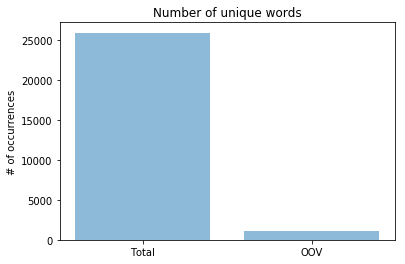

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('Total', 'OOV')
y_pos = np.arange(len(objects))
performance = [len(word_vectors), len(oov_words)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# of occurrences')
plt.title('Number of unique words')

plt.show()

In [18]:
print(f'Total words: {len(oov_words)+len(word_vectors)}')
print(f'Number of OOV words: {len(oov_words)}')

Total words: 27040
Number of OOV words: 1065


In [19]:
missing = round(len(oov_words)/len(word_vectors)*100)
print(f'Percentage of missing words: {missing}%')

Percentage of missing words: 4%


## Remove genres

In [25]:
import pandas as pd
text_data_df = pd.DataFrame.from_dict(text_data,orient='index')

text_data_df.head()


,genre,sentences
1,[other/dialogue],ritva hej jag heter ritva . vad heter du ? sa...
2,[facts/facts],solen skiner i sverige . det regnar i tysklan...
3,[other/letter],emil läser ett brev från mormor . han svarar ...
4,[narration/description],ellen har en pojke och en flicka . pojken är ...
5,[narration/fiction],hassan läser . hassan läser en tidning och et...


In [26]:
#text_data_df = text_data_df.dropna(how = 'all') 
#text_data_df.drop(text_data_df[text_data_df['genre'] == 'none'].index, inplace = True)
#text_data_df.loc[text_data_df["genre"] == "[none]"]
# making boolean series for a team name 



## Split data
Data is split into sets of 60/20/20 train/validation/testing.

In [27]:
batches = 16

In [28]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
    
    def __init__(self, data):
        """Initialization"""
        self.data = data

    def __len__(self):
        """Denotes the total number of samples"""
        return len(self.data)

    def __getitem__(self, index):
        """Generates one sample of data"""
        # Select sample
        sent1 = self.data[index]['genre']
        sent2 = self.data[index]['sentences']

        return genre, senteces 

In [29]:
len(text_data)

1120

## Solve Multi-Label Classification
Most learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.
Common solutions: **OneVsRest** or **Binary Relevance**

In case of imbalanced classes **confusion-matrix** is good technique to summarizing the performance of a classification algorithm.

### Binary Relevance
This is the simplest technique, which basically treats each label as a separate single class classification problem. One hot encode the genre by using sklearn’s MultiLabelBinarizer(). Since there are 36 unique genre tags, there are going to be 36 new target variables.

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(text_data_df['genre'])

# transform target variable
y = multilabel_binarizer.transform(text_data_df['genre'])

xtrain, xval, ytrain, yval = train_test_split(text_data_df['sentences'], y, test_size=0.2)
xtest, xval, ytest, yval = train_test_split(xval, yval, test_size=0.5)

In [31]:
#mlb = MultiLabelBinarizer()
#mlb_result = mlb.fit_transform([str(df.loc[i,'genre']).split(',') for i in range(len(df))])
#df_final = pd.concat([df['sentences'],pd.DataFrame(mlb_result,columns=list(mlb.classes_))],axis=1)

In [32]:
print(f'Number of training examples: {len(xtrain)}')
print(f'Number of validation examples: {len(xval)}')
print(f'Number of testing examples: {len(xtest)}')

Number of training examples: 896
Number of validation examples: 112
Number of testing examples: 112


In [33]:
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier


# use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem

# Logistic Regression
lr = LogisticRegression(solver='liblinear')
# new sklearn model behaviour solver
#lr = LogisticRegression(solver='lbfgs')


clf = OneVsRestClassifier(lr)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

#converts the arrays back into genre tags
multilabel_binarizer.inverse_transform(y_pred)



/usr/local/lib64/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))


[(),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 ('other/dialogue',),
 (),
 (),
 ('other/dialogue',),
 (),
 (),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('other/dialogue',),
 ('other/dialogue',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ()]

In [35]:
from sklearn.metrics import f1_score

# evaluate performance
f1_score(yval, y_pred, average="micro")

0.15584415584415584